In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


1.Loading the dataset

In [37]:
df = pd.read_csv('linear.csv')
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [38]:
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

Missing values per column:
 Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      3
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    3
Fuel Consumption Hwy (L/100 km)     2
Fuel Consumption Comb (L/100 km)    5
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [39]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


/var/folders/9k/f78pj45s44vcrflz9w3x210r0000gn/T/ipykernel_2658/2022249418.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/var/folders/9k/f78pj45s44vcrflz9w3x210r0000gn/T/ipykernel_2658/2022249418.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

2.Train and split data

In [40]:
X = df.drop(['CO2 Emissions(g/km)'], axis=1)
y = df['CO2 Emissions(g/km)']

In [41]:
X = pd.get_dummies(X, drop_first=True)

In [42]:
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (5908, 2139)
Testing set size: (1477, 2139)


3.Linear Regression

In [43]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [44]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 35.832910093799484
R2 Score: 0.989582328032858


4. and 5. coefficient

In [45]:
coefficients = pd.Series(lr.coef_, index=X.columns)
print("Feature coefficients:\n", coefficients.sort_values(ascending=False))

Feature coefficients:
 Model_IONIQ BLUE                59.889316
Model_IONIQ Blue                59.889316
Model_IONIQ                     52.869158
Model_Prius                     49.694416
Model_PRIUS                     44.830871
                                  ...    
Model_HURACAN                  -18.803938
Model_HIGHLANDER HYBRID AWD    -18.836234
Fuel Type_Z                    -28.867939
Fuel Type_X                    -31.320871
Fuel Type_E                   -123.613472
Length: 2139, dtype: float64


The features with the highest absolute coefficients have the most influence on CO2 emissions. 

6.Based on city highway and combined

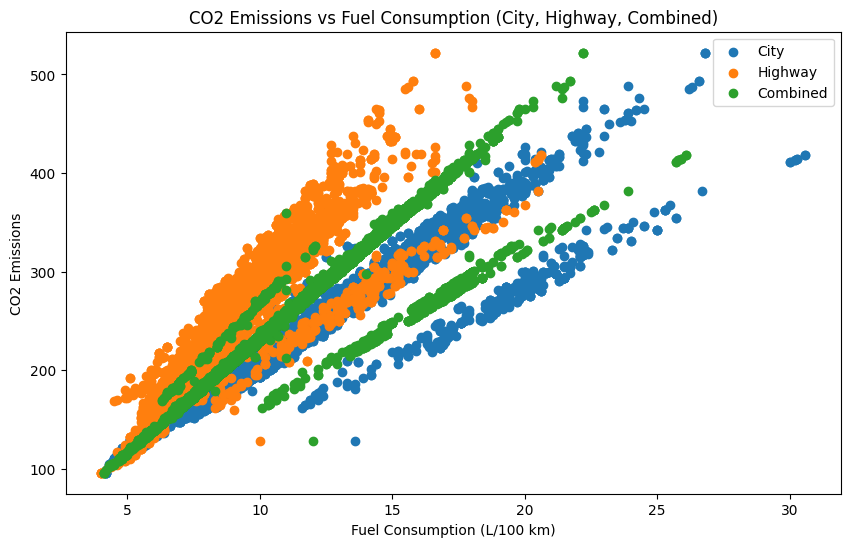

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df['Fuel Consumption City (L/100 km)'], df['CO2 Emissions(g/km)'], label='City')
plt.scatter(df['Fuel Consumption Hwy (L/100 km)'], df['CO2 Emissions(g/km)'], label='Highway')
plt.scatter(df['Fuel Consumption Comb (L/100 km)'], df['CO2 Emissions(g/km)'], label='Combined')
plt.xlabel('Fuel Consumption (L/100 km)')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.title('CO2 Emissions vs Fuel Consumption (City, Highway, Combined)')
plt.show()

- The scatter plot above shows the relationship between CO2 emissions and different types of fuel consumption.
- Combined fuel consumption may provide a more holistic view, but city and highway consumption can show different patterns.
- The most influencing features can be identified from the regression coefficients.